In [93]:
import numpy as np
import numpy.random as rng
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
from sympy import symbols, integrate, exp, oo
%matplotlib inline
import pandas as pd
from scipy.stats import t
from scipy.stats import expon
from scipy.stats import halfcauchy
from scipy.stats import norm
import numpy as np
import math
from scipy.stats import gamma
from scipy.stats import multivariate_normal

In [94]:
x=np.arange(100)
y=np.random.normal(-2+x*5, 20)
print(x, y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] [  17.20055171   -2.97528065   33.73246479   16.13265817   18.18990953
   23.48386579   11.40443387   14.85548459   32.77705684   37.81291909
   15.80894547   98.78736072   65.99127943   79.25104939   83.5840515
   43.2365639    89.62578486  106.49549125   71.65965717   78.10164228
  129.05525405  122.40655248  124.256233    121.28591943   95.28060618
  111.57844969  114.23714298  138.90286593  175.77179632  150.95023381
  100.84242893  156.49994031  170.88209912  173.34927459  141.68580747
  180.94738766  192.90145624  197.10951424  208.75236113  195.4891632
  229.25311012  197.5924642   207.11929692  182.73216702  200.39123492
  262.1240102   214.05198954  250.65087304  248.94398777  

In [95]:
n=1000
lam=np.zeros(n)
gam=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)
lam[0]=.5
gam[0]=.5
alpha[0]=0
beta[0]=0


a=1
b=1
import time


In [96]:
def update_phi(lam_star, prev_phi, prev_alph, prev_beta):
    r1=sum(norm.logpdf(y,  loc=prev_alph+prev_beta*x, scale=1/np.sqrt(lam_star)))+gamma.logpdf(lam_star, a, scale=b)
    r2=sum(norm.logpdf(y,  loc=prev_alph+prev_beta*x, scale=1/np.sqrt(prev_phi)))+gamma.logpdf(prev_phi, a, scale=b)
    log_rl=r1-r2
    if exp(log_rl)>exp(meas) and m_lam_star>0:
        new_phi=lam_star
    else:
        new_phi=prev_alph
    return(new_phi)

def update_alpha(alpha_star, prev_phi, prev_alpha, prev_beta):
    a1=sum(norm.logpdf(y, loc=alpha_star+prev_beta*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(alpha_star, 0, 10)
    a2=sum(norm.logpdf(y, loc=prev_alpha+prev_beta*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(prev_alpha, 0, 10)
    log_ra=a1-a2
    if exp(log_ra)>exp(meas):
        new_alpha=alpha_star
    else:
        new_alpha=prev_alpha
    return(new_alpha)

def update_beta(beta_star, prev_phi, prev_alpha, prev_beta):
    b1=sum(norm.logpdf(y, loc=prev_alpha+beta_star*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(beta_star, 0, 10)
    b2=sum(norm.logpdf(y, loc=prev_alpha+prev_beta*x, scale=1/np.sqrt(prev_phi)))+norm.logpdf(prev_beta, 0, 10)    
    log_rb=b1-b2
    if exp(log_rb)>exp(meas):
        new_beta=beta_star
    else:
        new_beta=prev_beta
    return(new_beta)


In [97]:
start = time.clock()
for i in range(1, n):
    alpha_star=np.random.normal(alpha[i-1], 2)
    beta_star=np.random.normal(beta[i-1], 2)
    m_lam_star=np.random.normal(gam[i-1], 3)
    if(m_lam_star>0):
        lam_star=m_lam_star
    else:
        lam_star=lam[i-1]
        
    meas=math.log(np.random.uniform(0,1))    
    
    lam[i]=update_phi(lam_star, lam[i-1], alpha[i-1], beta[i-1])
    alpha[i]=update_alpha(alpha_star, lam[i-1], alpha[i-1], beta[i-1])
    beta[i]=update_beta(beta_star, lam[i-1], alpha[i-1], beta[i-1])

dt_mh_1000 = time.clock() - start
print('Time:', dt_mh_1000)

Time: 2.6197150150546804


nan -2.39581226051 4.97809527391


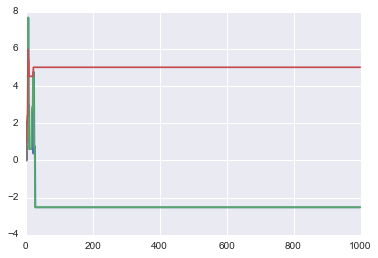

In [98]:
from numpy import mean

print(mean(1/np.sqrt(lam)), mean(alpha), mean(beta))

plt.plot(lam)
plt.plot(alpha)
plt.plot(beta)

y_sim=mean(alpha)+mean(beta)*x

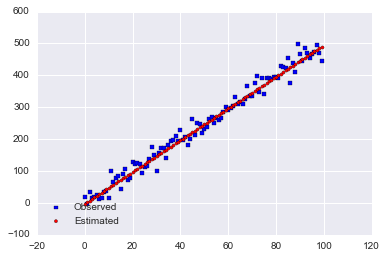

In [99]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Observed')
ax1.scatter(x, y_sim, s=10, c='r', marker="o", label='Estimated')
plt.legend(loc='lower left');
plt.show()

In [100]:
print(np.sum(y)/np.sum(x))

4.98117936512


In [101]:
n_y=10
n=1000
tau=np.zeros(n)+1
gam=np.zeros(n)
alpha=np.zeros(n)
beta=np.zeros(n)
alpha[0]=0
beta[0]=2
tau[0]=1

a=1
b=1
import time
tnot=1
print(mean(beta), mean(tau))

for i in range(1, n):
    s_n=np.sum(x**2)+tnot
    mu_n=(1/s_n)*(np.sum(x*y))
    beta[i]=norm.rvs(mu_n, (1/np.sqrt(tau[i-1]))*(1/np.sqrt(s_n)))
    tau[i]=gamma.rvs(a+n_y/2, 1/(np.sum(y**2) -mu_n*s_n*mu_n))

print(beta[0:20])

0.002 1.0
[ 2.          4.97418101  4.98087731  4.97745672  4.97683721  4.97690543
  4.97709686  4.97697534  4.9767393   4.97921362  4.97775915  4.97768292
  4.97784929  4.97769122  4.9784774   4.97811648  4.97798184  4.97657274
  4.97840617  4.97616304]


5.28531474522


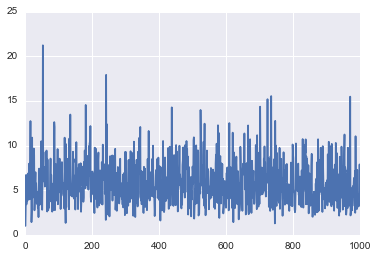

In [102]:
plt.plot(tau)
print(gamma.rvs(a+n_y/2, 1/(b+np.sum((y-(x*beta[i-1]))**2)/2)))

In [103]:
burn_in=n/2
print(mean(beta[burn_in:n]), mean(1/np.sqrt(tau[burn_in:n])))

4.97777028979 0.445175094263


C:\Users\Jody\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


C:\Users\Jody\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


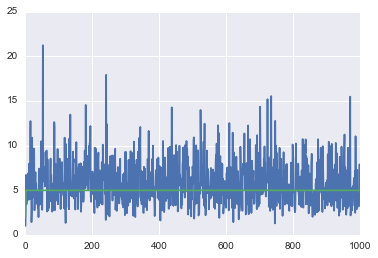

In [104]:
from numpy import mean

plt.plot(tau)
plt.plot(beta)

y_sim=norm.rvs(x*mean(beta[burn_in:n]), 1/np.sqrt(mean(tau[burn_in:n])))

[0 1 2 3 4 5 6 7 8 9] [  4.11041832   8.7096047    9.14511461  13.30320855  24.05593802
  26.76575757  34.76569795  35.51748072  37.52975908  46.33325535]


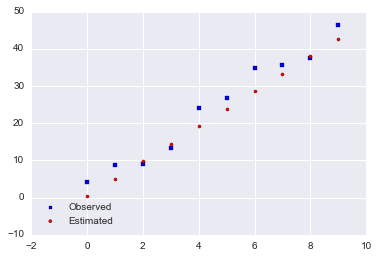

[  4.11041832   8.7096047    9.14511461  13.30320855  24.05593802
  26.76575757  34.76569795  35.51748072  37.52975908  46.33325535]
[0 1 2 3 4 5 6 7 8 9]


In [62]:
x=np.arange(10)
y=np.random.normal(x*5, 2)

print(x, y)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='Observed')
ax1.scatter(x, y_sim, s=10, c='r', marker="o", label='Estimated')
plt.legend(loc='lower left');
plt.show()
print(y)
print(x)

In [89]:
M = 100000
eps = .005
L= 20

A = stats.wishart.rvs(df=15, scale= np.eye(15))
true_theta = np.random.multivariate_normal(mean=np.zeros(15),cov=A,size=100)
#target distribution is zero-mean 250-dimensional multivariate normal with known precision
theta0 = stats.norm.rvs(size=15)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)
print(true_theta)

[[-4.35806573 -0.58777885 -0.75999403 ...,  1.57128843 -1.71378864
  -1.82667719]
 [ 0.79820925  0.5538817   2.96299156 ..., -0.65424555  1.62940571
  -2.09478395]
 [ 4.86964019  3.0529098  -3.80926847 ..., -5.95022876  3.22528736
   5.33127209]
 ..., 
 [ 1.88293724 -0.82176205 -7.66585461 ..., -2.36698757  3.40622297
   4.53376124]
 [-1.38330391 -2.25504233  0.3029766  ...,  7.57334175 -2.96288737
  -6.64083361]
 [ 0.95298583  5.16494659  4.60045153 ..., -6.65486529 -0.22295815
  -1.51582964]]


In [119]:
def update_theta_mvn(theta_star, prev_theta, A):
    r1=sum(multivariate_normal.logpdf(true_theta,  mean=theta_star, cov=A))+sum(norm.logpdf(theta_star, 0, 10))
    r2=sum(multivariate_normal.logpdf(true_theta,  mean=prev_theta, cov=A))+sum(norm.logpdf(prev_theta, 0, 10))
    log_rl=r1-r2
    if exp(log_rl)>exp(meas):
        new_theta=theta_star
    else:
        new_theta=prev_theta
    return(new_theta)

In [142]:
n_y=100
n=10000
no_par = theta0.shape[0]
theta_m = np.zeros((n,no_par))
theta_m[0,:] = theta0

start = time.clock()
for i in range(1, n):
    theta_star=np.random.normal(theta_m[i-1,:], 1)
    meas=math.log(np.random.uniform(0,1))    
    theta_m[i,:]=update_theta_mvn(theta_star, theta_m[i-1,:], A)

dt_mh_1000 = time.clock() - start
print('Time:', dt_mh_1000)
results=theta_m

Time: 13.59623099048622


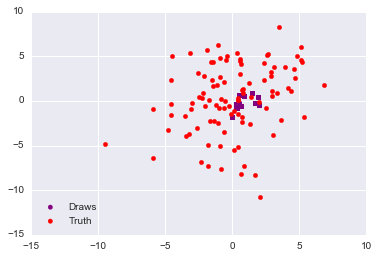

In [143]:
thinned_results = results[[x for x in range(n) if x % 1 == 0],:]
plt.scatter(thinned_results[:,1], thinned_results[:,2], color="purple", label="Draws")
plt.scatter(true_theta[:,1], true_theta[:,2], color="red", label="Truth")
plt.legend(loc='lower left')